## Подключение диска для сохранения



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# Корневая папка на диске для работы с заданием
os.chdir('/content/drive/Othercomputers/Компьютер/Documents/МФТИ - Наука о данных/Основы ML/DZ')
os.getcwd()

'/content/drive/Othercomputers/Компьютер/Documents/МФТИ - Наука о данных/Основы ML/DZ'

# Задача
Необходимо построить прогнозную модель, которая сможет определить, перестанет ли клиент банка пользоваться кредитной картой.

В таблице представлены следующие столбцы:

- `CLIENTNUM` - Номер клиента. Уникальный идентификатор клиента, которому принадлежит счет

- `Attrition_Flag` - Aктивность клиента — если учетная запись закрыта, то Attrited Customer, иначе Existing Customer

- `Customer_Age` - Bозраст клиента в годах

- `Gender` - М=мужчина, Ж=женщина

- `Dependent_count` - Количество иждивенцев

- `Education_Level` - Образование, квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)

- `Marital_Status` - Женат, Холост, Разведен, Неизвестно

- `Income_Category` - Категория годового дохода владельца счета (< 40 000 долларов США, 40 000-60 000 долларов США, 60 000-80 000 долларов США, 80 000-120 000 долларов США, >

- `Card_Category` - Тип карты (Синяя, Серебряная, Золотая, Платиновая)

- `Months_on_book` - Период отношений с банком

- `Total_Relationship_Count` - Общее количество продукции, хранящейся у клиента

- `Months_Inactive_12_mon` - Количество месяцев бездействия за последние 12 месяцев

- `Contacts_Count_12_mon` - Количество контактов за последние 12 месяцев

- `Credit_Limit` - Кредитный лимит по кредитной карте

- `Total_Revolving_Bal` - Общий оборотный баланс на кредитной карте

- `Avg_Open_To_Buy` - Открытая кредитная линия для покупки (среднее значение за последние 12 месяцев)

- `Total_Amt_Chng_Q4_Q1` - Изменение суммы транзакции (Q4 по сравнению с Q1)

- `Total_Trans_Amt` - Общая сумма транзакции (последние 12 месяцев)

- `Total_Trans_Ct` - Общее количество транзакций (последние 12 месяцев)

- `Total_Ct_Chng_Q4_Q1` - Изменение количества транзакций (Q4 по сравнению с Q1)

- `Avg_Utilization_Ratio` - Средний коэффициент использования карт

## Загрузка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
url = 'https://drive.google.com/file/d/1b7DyUp4DCbrNcIIC86frrB-jse-JPc7o/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_train = pd.read_csv(url)
df_train.head() 

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer


In [5]:
df_train.Attrition_Flag

0       Attrited Customer
1       Existing Customer
2       Existing Customer
3       Existing Customer
4       Existing Customer
              ...        
7590    Existing Customer
7591    Existing Customer
7592    Existing Customer
7593    Existing Customer
7594    Existing Customer
Name: Attrition_Flag, Length: 7595, dtype: object

In [6]:
url = 'https://drive.google.com/file/d/110QKB0XuG_8sxKWqglKP47bv9lrHqsXP/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_val = pd.read_csv(url)
df_val.head() 

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,719682183,53,F,2,Unknown,Single,$40K - $60K,Blue,43,3,4,4,6188.0,2517,3671.0,0.713,1997,43,1.048,0.407
1,711341433,34,F,2,Graduate,Single,Unknown,Blue,24,6,3,3,3095.0,2010,1085.0,0.668,3901,77,0.711,0.649
2,716154258,48,M,4,Doctorate,Unknown,$60K - $80K,Silver,38,3,2,2,32658.0,1482,31176.0,0.941,2023,37,0.542,0.045
3,779749908,48,M,4,College,Married,$60K - $80K,Gold,33,2,2,3,34516.0,2061,32455.0,0.722,1350,32,0.455,0.060
4,710854008,48,M,3,Unknown,Unknown,$40K - $60K,Blue,37,3,2,4,6541.0,1119,5422.0,0.496,3902,63,0.432,0.171


### 1й осмотр данных

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,7595.0,7.393515e+08,3.698152e+07,708082083.0,7.130482e+08,7.179543e+08,7.741359e+08,8.282989e+08
Customer_Age,7595.0,4.630296e+01,7.951111e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,7595.0,2.353259e+00,1.298548e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,7595.0,3.592943e+01,7.899472e+00,13.0,3.200000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,7595.0,3.814352e+00,1.547264e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,7595.0,2.354575e+00,1.009706e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,7595.0,2.458328e+00,1.105780e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,7595.0,8.654540e+03,9.102154e+03,1438.3,2.554000e+03,4.562000e+03,1.110400e+04,3.451600e+04
Total_Revolving_Bal,7595.0,1.165152e+03,8.137423e+02,0.0,4.530000e+02,1.285000e+03,1.779000e+03,2.517000e+03
Avg_Open_To_Buy,7595.0,7.489388e+03,9.101372e+03,3.0,1.352500e+03,3.492000e+03,9.894000e+03,3.451600e+04


In [8]:
df_train.isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [9]:
df_val.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,2532.0,7.386559e+08,3.667193e+07,708084558.0,7.130223e+08,7.178419e+08,7.721678e+08,8.283431e+08
Customer_Age,2532.0,4.639494e+01,8.211955e+00,26.0,4.100000e+01,4.700000e+01,5.200000e+01,6.800000e+01
Dependent_count,2532.0,2.325039e+00,1.300016e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,2532.0,3.592536e+01,8.243309e+00,13.0,3.100000e+01,3.600000e+01,4.100000e+01,5.600000e+01
Total_Relationship_Count,2532.0,3.807267e+00,1.575938e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,2532.0,2.300948e+00,1.012501e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,2532.0,2.446288e+00,1.107729e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,2532.0,8.564203e+03,9.049986e+03,1438.3,2.555000e+03,4.471000e+03,1.095500e+04,3.451600e+04
Total_Revolving_Bal,2532.0,1.155800e+03,8.188317e+02,0.0,2.130000e+02,1.257000e+03,1.789500e+03,2.517000e+03
Avg_Open_To_Buy,2532.0,7.408403e+03,9.060076e+03,14.0,1.212500e+03,3.450000e+03,9.804000e+03,3.451600e+04


In [10]:
df_val.isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### типы данных

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

In [12]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2532 non-null   int64  
 1   Customer_Age              2532 non-null   int64  
 2   Gender                    2532 non-null   object 
 3   Dependent_count           2532 non-null   int64  
 4   Education_Level           2532 non-null   object 
 5   Marital_Status            2532 non-null   object 
 6   Income_Category           2532 non-null   object 
 7   Card_Category             2532 non-null   object 
 8   Months_on_book            2532 non-null   int64  
 9   Total_Relationship_Count  2532 non-null   int64  
 10  Months_Inactive_12_mon    2532 non-null   int64  
 11  Contacts_Count_12_mon     2532 non-null   int64  
 12  Credit_Limit              2532 non-null   float64
 13  Total_Revolving_Bal       2532 non-null   int64  
 14  Avg_Open

## Пред_анализ данных
графики:
- https://habr.com/ru/company/otus/blog/540526/
- https://pythonru.com/biblioteki/seaborn-plot
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

### целевая

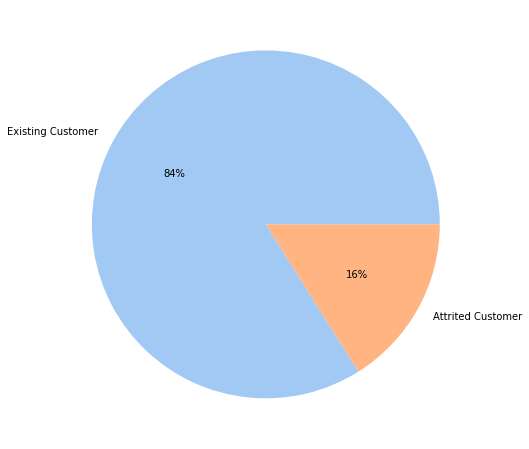

In [14]:
#define data
data = df_train['Attrition_Flag'].value_counts()
labels = data.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Видим явный дисбаланс

### числовые

In [15]:
def plot_num_rate(data, feature, aim):
    
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=feature,hue= aim,kde=True);

    plt.subplot(1,2,2)
    sns.boxplot(x=aim, y=feature,data=data);

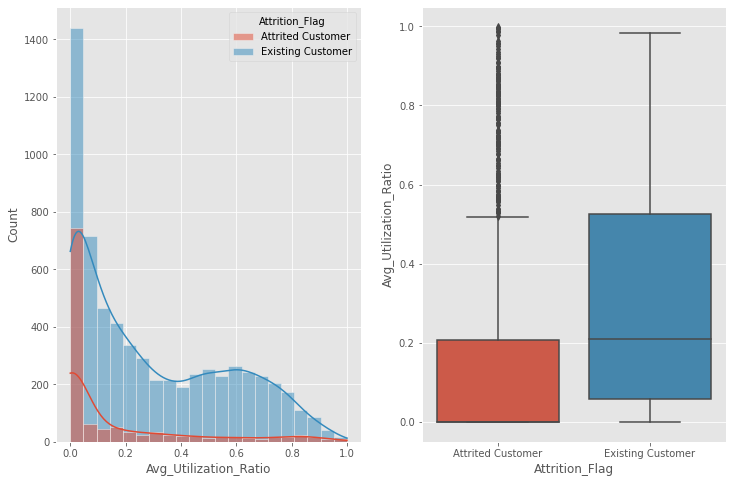

In [16]:
plot_num_rate(df_train, 'Avg_Utilization_Ratio', 'Attrition_Flag')

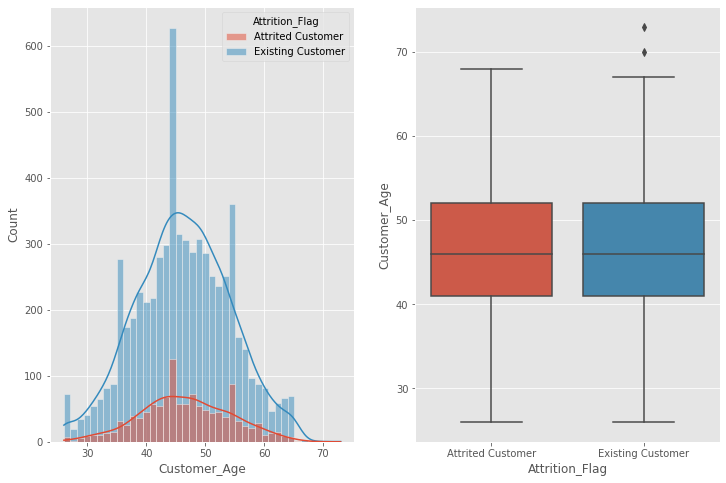

In [17]:
plot_num_rate(df_train, 'Customer_Age', 'Attrition_Flag')

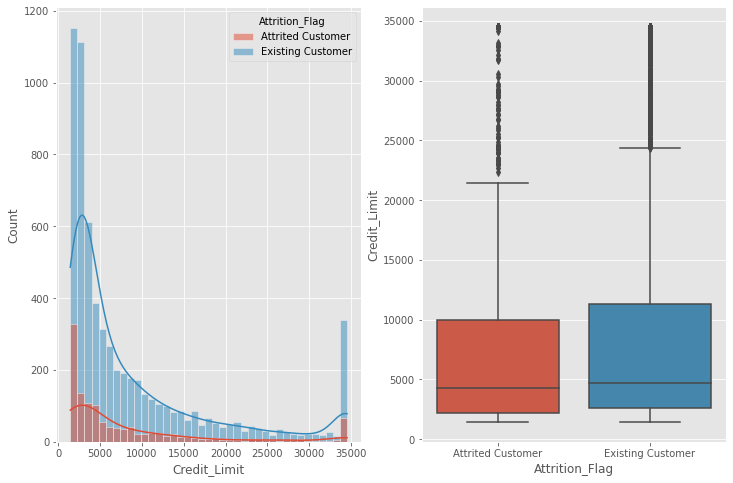

In [18]:
plot_num_rate(df_train, 'Credit_Limit', 'Attrition_Flag')

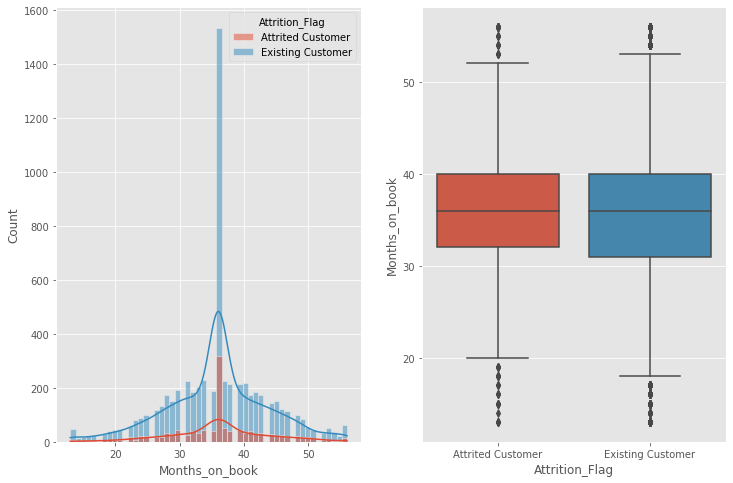

In [19]:
plot_num_rate(df_train, 'Months_on_book', 'Attrition_Flag')

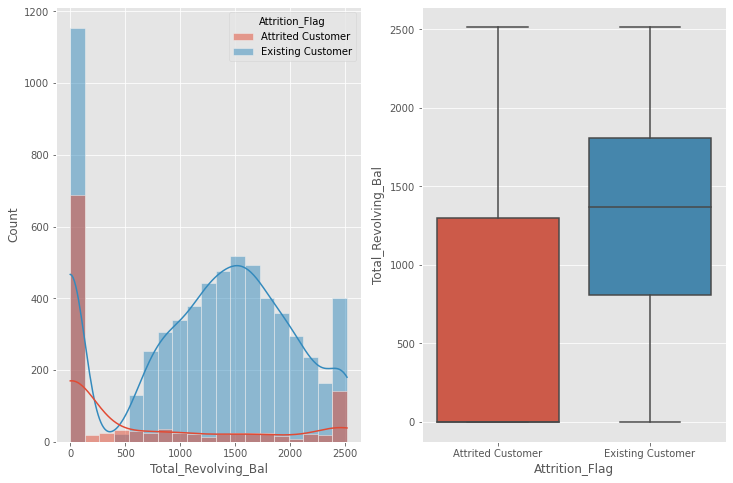

In [20]:
plot_num_rate(df_train, 'Total_Revolving_Bal', 'Attrition_Flag')

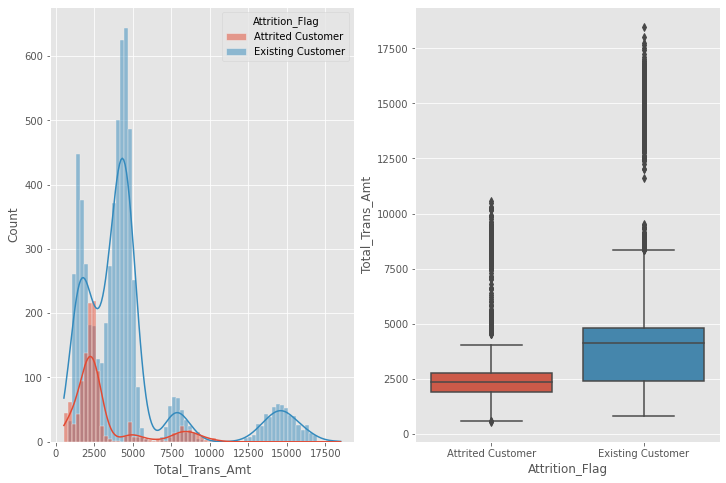

In [21]:
plot_num_rate(df_train, 'Total_Trans_Amt', 'Attrition_Flag')

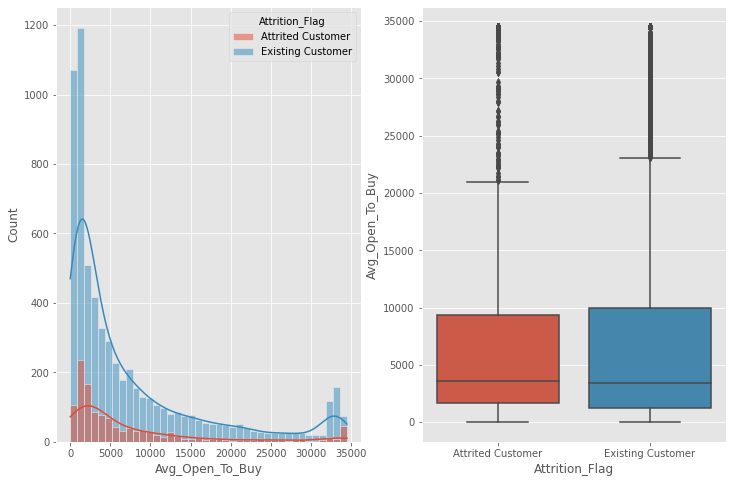

In [22]:
plot_num_rate(df_train, 'Avg_Open_To_Buy', 'Attrition_Flag')

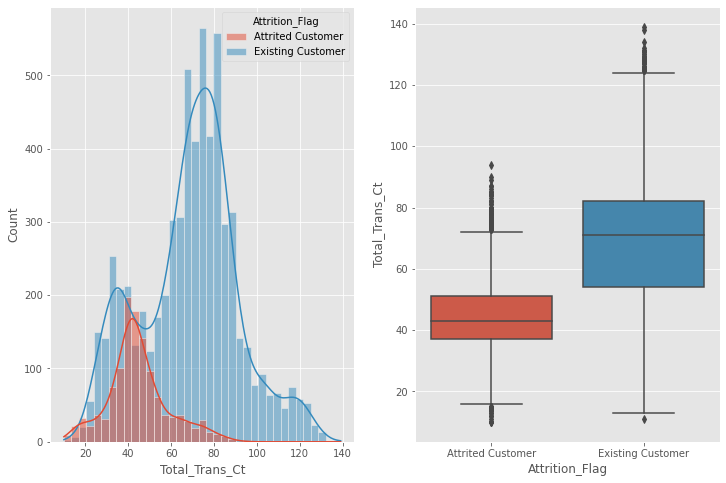

In [23]:
plot_num_rate(df_train, 'Total_Trans_Ct', 'Attrition_Flag')

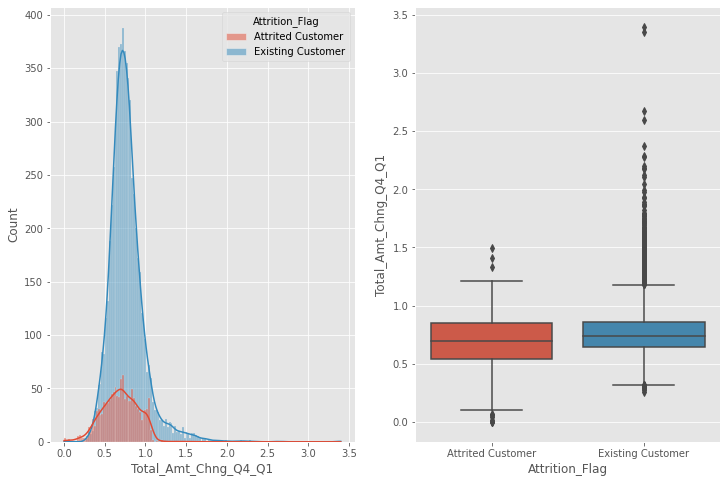

In [24]:
plot_num_rate(df_train, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

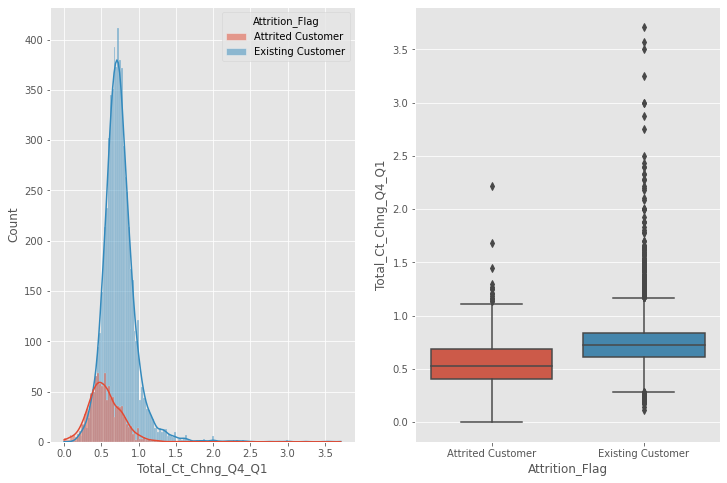

In [25]:
plot_num_rate(df_train, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

Целевая переенная наибоее чувствительна 
- Avg_Utilization_Ratio
- Total_Revolving_Bal
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1

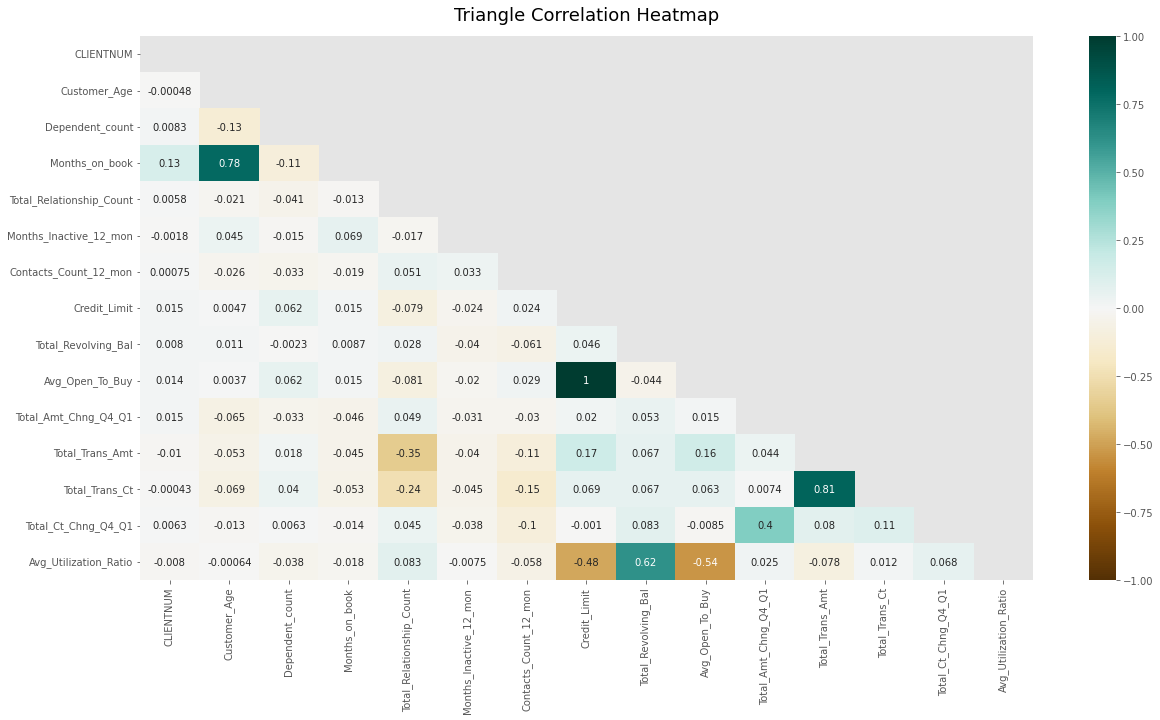

In [26]:
number_features = df_train.select_dtypes(include=['number']).dtypes.index
dataframe = df_train[number_features]

plt.figure(figsize=(20, 10)) 
# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

черезмерная корреляция:
- Months_on_book и Customer_Age
- Avg_Open_To_Buy и Credit_Limit
- Total_Revolving_Bal и Avg_Utilization_Ratio
- Total_Trans_Amt и Total_Trans_Ct
- Avg_Open_To_Buy и Avg_Utilization_Ratio
- Avg_Utilization_Ratio и Credit_Limit

___
кандидаты на удаление:

**Months_on_book, Avg_Utilization_Ratio, Total_Trans_Ct, Avg_Open_To_Buy**

In [27]:
# Выделим их в отдельный список, чтобы потом пробовать с ними и без 
cross_corr_features = ['Months_on_book', 'Avg_Utilization_Ratio', 'Total_Trans_Ct', 'Avg_Open_To_Buy']

In [28]:
def plot_num_compare(data, cat_1, cat_2, aim):
  sns.jointplot(x=cat_1, y=cat_2, hue=aim, data=data, height=7);



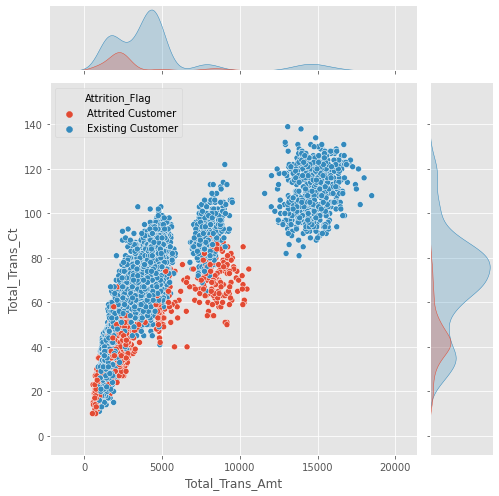

In [29]:
plot_num_compare(df_train, 'Total_Trans_Amt','Total_Trans_Ct', 'Attrition_Flag')

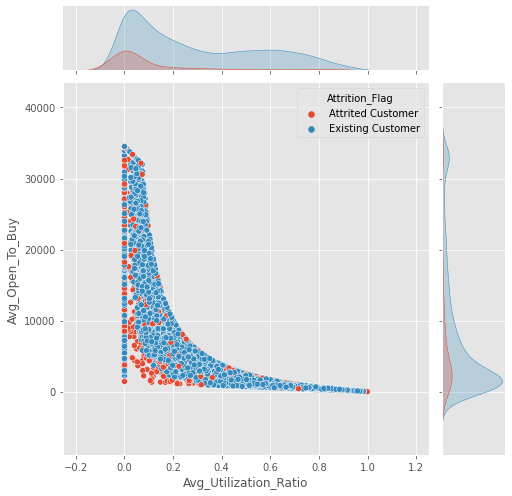

In [30]:
plot_num_compare(df_train, 'Avg_Utilization_Ratio','Avg_Open_To_Buy', 'Attrition_Flag')

### категориальные (object_features)

In [31]:
object_features = list(df_train.select_dtypes(include=['object']).dtypes.index)
object_features.remove('Attrition_Flag')

In [32]:
def show_categorical(data, features):
    # Посмотрим на распределение категориальных фичей
    for col_name in features:
      print(f'{col_name} Распределение')
      print(data[col_name].value_counts())
      print(f'Тип данных {data[col_name].dtype}')
      if data[col_name].isnull().sum():
        print(f'Есть пропуски в данных_________')
      print()

In [33]:
show_categorical(df_train, object_features)

Gender Распределение
F    4010
M    3585
Name: Gender, dtype: int64
Тип данных object

Education_Level Распределение
Graduate         2322
High School      1518
Unknown          1169
Uneducated       1126
College           752
Post-Graduate     373
Doctorate         335
Name: Education_Level, dtype: int64
Тип данных object

Marital_Status Распределение
Married     3480
Single      2987
Divorced     574
Unknown      554
Name: Marital_Status, dtype: int64
Тип данных object

Income_Category Распределение
Less than $40K    2675
$40K - $60K       1309
$80K - $120K      1160
$60K - $80K       1047
Unknown            846
$120K +            558
Name: Income_Category, dtype: int64
Тип данных object

Card_Category Распределение
Blue        7065
Silver       423
Gold          91
Platinum      16
Name: Card_Category, dtype: int64
Тип данных object



In [34]:
def plot_cat(data, var, aim):
    
    inter=data.groupby(var)[aim].mean()
    order=inter.index
    
    plt.subplot(1,2,1)
    sns.countplot(x=var,data=data,order=order);
    
    plt.subplot(1,2,2)
    plt.pie(inter, labels=order, autopct="%0.1f%%",radius=1);
    
    plt.tight_layout()

### Переводим целевой в класс для возможности отобразить

In [35]:
df_train['Attrition_Flag'] = df_train['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df_train['Attrition_Flag'].value_counts()

0    6375
1    1220
Name: Attrition_Flag, dtype: int64

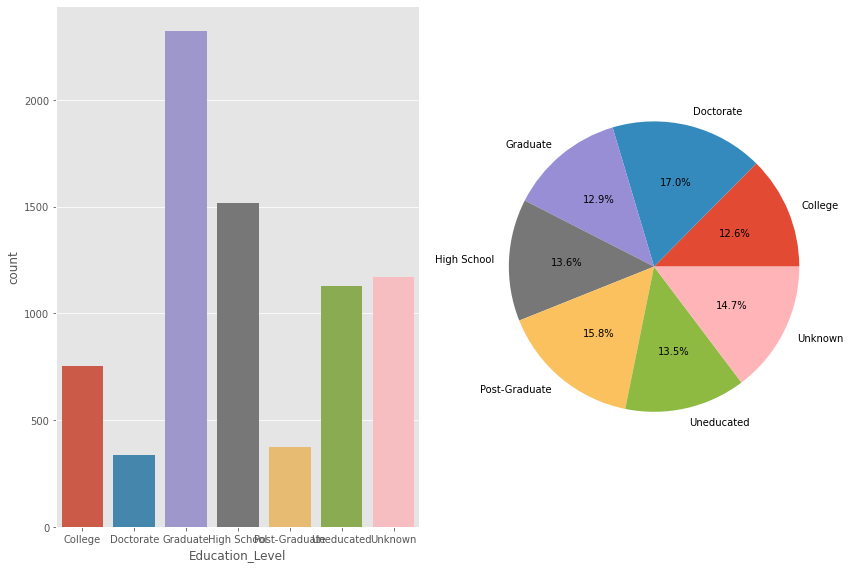

In [36]:
plot_cat(df_train, 'Education_Level' , 'Attrition_Flag')

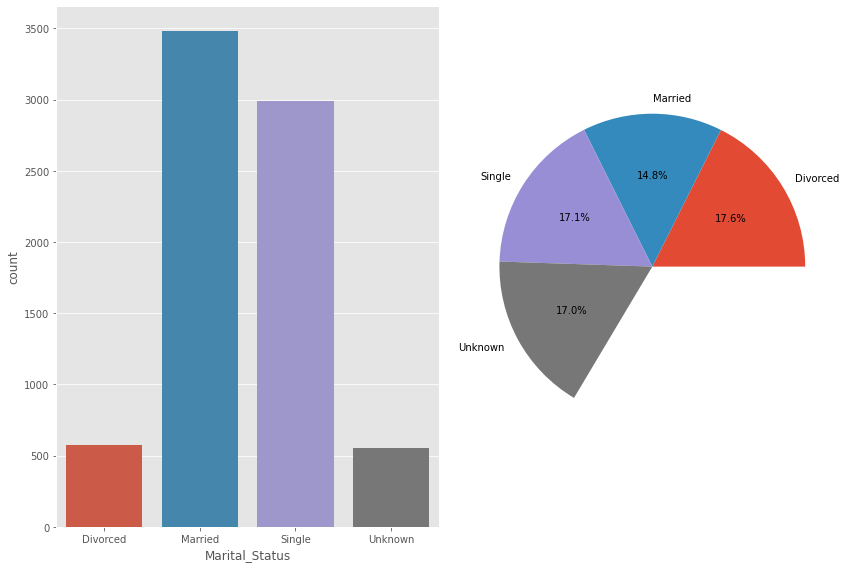

In [37]:
plot_cat(df_train, 'Marital_Status' , 'Attrition_Flag')

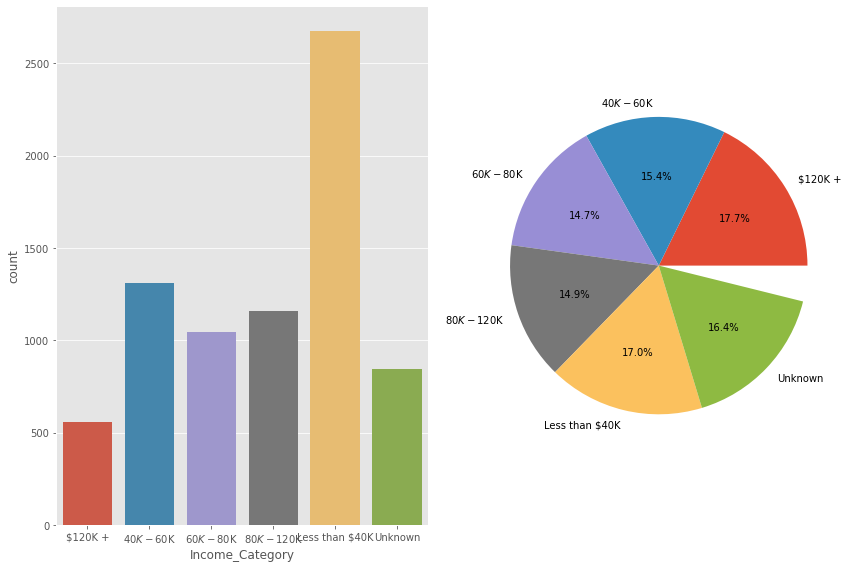

In [38]:
plot_cat(df_train, 'Income_Category' , 'Attrition_Flag')

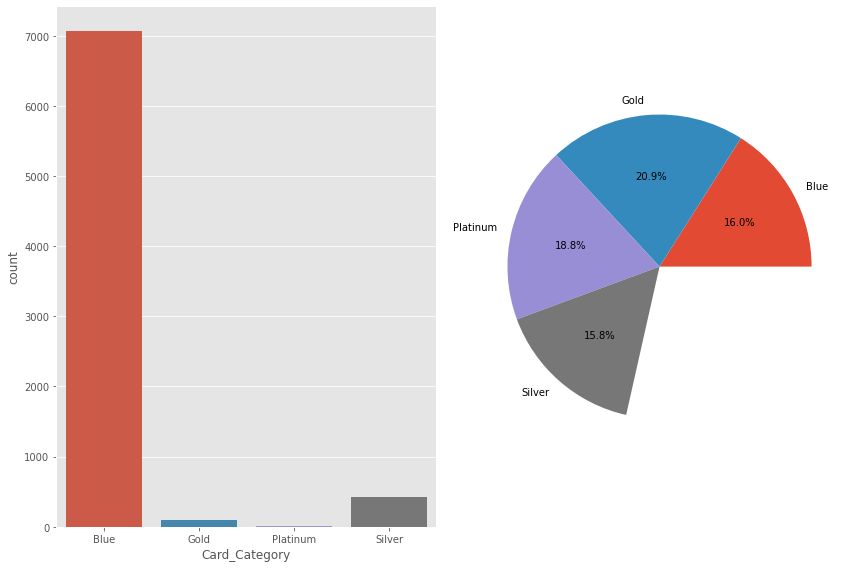

In [39]:
plot_cat(df_train, 'Card_Category' , 'Attrition_Flag')

## Что куда отнесем?



В таблице представлены следующие столбцы:

- `CLIENTNUM` - Номер клиента. Уникальный идентификатор клиента, которому принадлежит счет

- `Attrition_Flag` - Aктивность клиента — если учетная запись закрыта, то Attrited Customer, иначе Existing Customer

- `Customer_Age` - Bозраст клиента в годах

- `Gender` - М=мужчина, Ж=женщина

- `Dependent_count` - Количество иждивенцев

- `Education_Level` - Образование, квалификация владельца счета (пример: средняя школа, выпускник колледжа и т. д.)

- `Marital_Status` - Женат, Холост, Разведен, Неизвестно

- `Income_Category` - Категория годового дохода владельца счета (< 40 000 долларов США, 40 000-60 000 долларов США, 60 000-80 000 долларов США, 80 000-120 000 долларов США, >

- `Card_Category` - Тип карты (Синяя, Серебряная, Золотая, Платиновая)

- `Months_on_book` - Период отношений с банком

- `Total_Relationship_Count` - Общее количество продукции, хранящейся у клиента

- `Months_Inactive_12_mon` - Количество месяцев бездействия за последние 12 месяцев

- `Contacts_Count_12_mon` - Количество контактов за последние 12 месяцев

- `Credit_Limit` - Кредитный лимит по кредитной карте

- `Total_Revolving_Bal` - Общий оборотный баланс на кредитной карте

- `Avg_Open_To_Buy` - Открытая кредитная линия для покупки (среднее значение за последние 12 месяцев)

- `Total_Amt_Chng_Q4_Q1` - Изменение суммы транзакции (Q4 по сравнению с Q1)

- `Total_Trans_Amt` - Общая сумма транзакции (последние 12 месяцев)

- `Total_Trans_Ct` - Общее количество транзакций (последние 12 месяцев)

- `Total_Ct_Chng_Q4_Q1` - Изменение количества транзакций (Q4 по сравнению с Q1)

- `Avg_Utilization_Ratio` - Средний коэффициент использования карт

In [40]:
target = ['Attrition_Flag']
all_features = df_train.columns.tolist()
all_features.remove('Attrition_Flag')
all_features

['CLIENTNUM',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [65]:
# отсев части данных с высоко корреляцией из списка cross_corr_features
def check(x):
  if x not in (cross_corr_features):# + ['CLIENTNUM']):
    return x

In [67]:
main_features = list(filter(check, all_features))
main_features

['CLIENTNUM',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1']

In [68]:
df_train[main_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Total_Relationship_Count  7595 non-null   int64  
 9   Months_Inactive_12_mon    7595 non-null   int64  
 10  Contacts_Count_12_mon     7595 non-null   int64  
 11  Credit_Limit              7595 non-null   float64
 12  Total_Revolving_Bal       7595 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      7595 non-null   float64
 14  Total_Tr

- Customer_Age    - порядковое числовое отношение
- Gender          - категориальный класс
- Dependent_count - порядковое числовое отношение
- Education_Level - порядковое категориальное отношение
- Marital_Status  - категориальный класс 
- Income_Category  - порядковое категориальное отношение
- Card_Category - порядковое категориальное отношение
- Total_Relationship_Count - порядковое числовое отношение
- Months_Inactive_12_mon - порядковое числовое отношение

.... остальные основные - порядковое числовое отношение

_____

В итоге в основных данных в категориях:

- в класс нужно переводить  `Gender` и `Marital_Status`;

- в порядковые категориальные метки отношений переводим `Education_Level`, `Income_Category`, `Card_Category`

Так как такие модели бустинга как ` HistGradientBoostingRegressor` и `CatBoost` поддерживают наитивную поддержку категориаьных признаков ([пример](https://scikit-learn.org//stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py)), то можно подавать колонки как есть в них, но указав категориальные признаки


In [148]:
cat_features = ['Gender', 'Education_Level', 
                'Marital_Status', 'Income_Category', 'Card_Category']

## Корреляция с целевой переменной

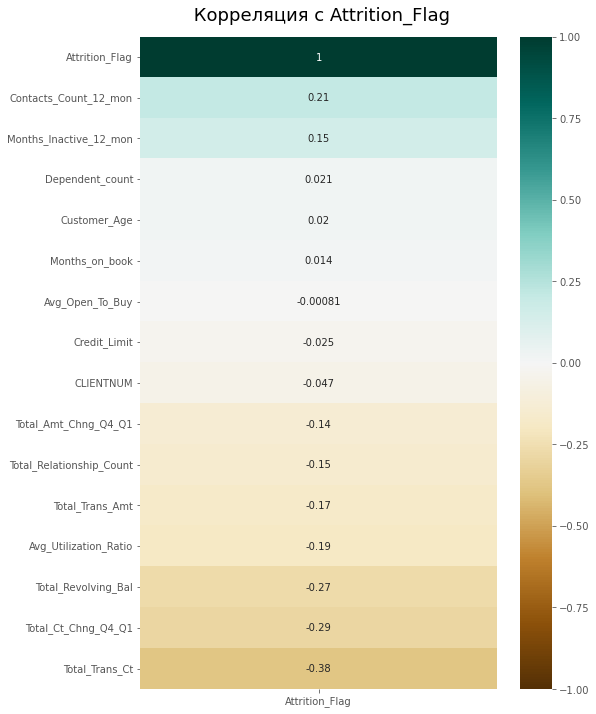

In [149]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df_train.corr()[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title(' Корреляция с Attrition_Flag', fontdict={'fontsize':18}, pad=16);

## Подготовка данных к обучению
***

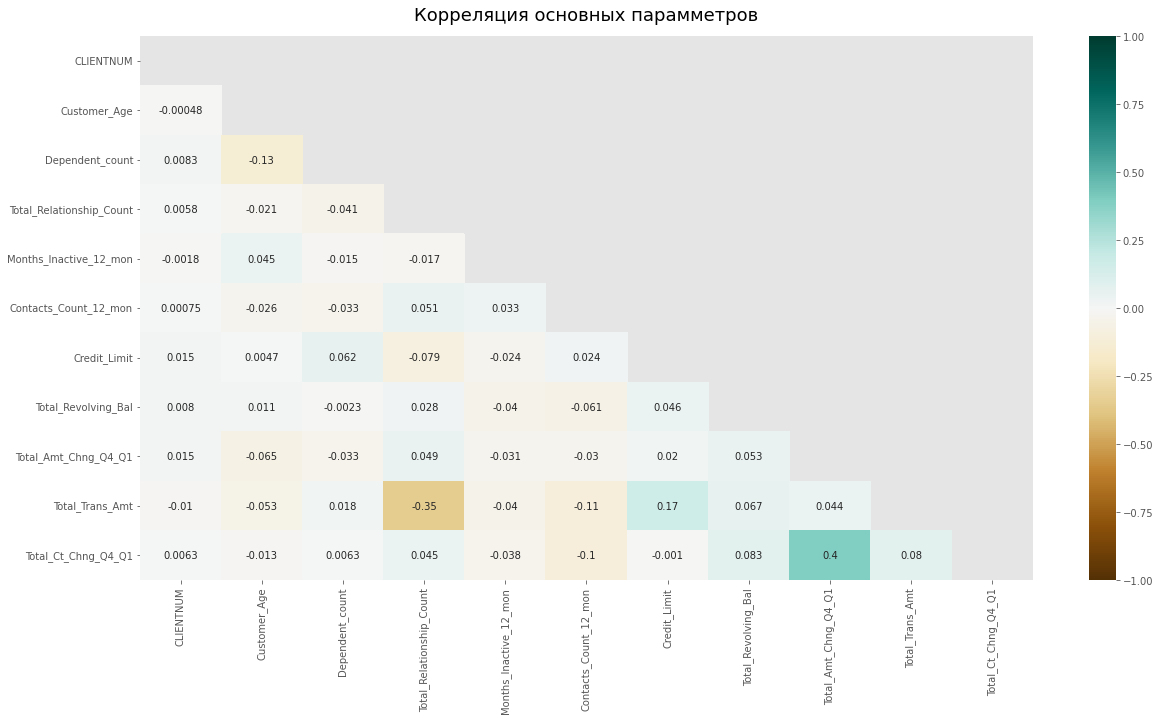

In [150]:
dataframe = df_train[main_features]

plt.figure(figsize=(20, 10)) 
# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Корреляция основных парамметров', fontdict={'fontsize':18}, pad=16);

In [151]:
# Это будут основные учебные компоненты данных, без части имеющих высокую корреляцию между собой
x_main_data = df_train[main_features]

# Это целевая переменная 
y_data = df_train.Attrition_Flag.to_numpy()

# Это будут основные тестовые компоненты данных, без части имеющих высокую корреляцию между собой
x_main_test = df_val[main_features]
cat_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

###учтем вес классов

In [153]:
# классы
classes = np.unique(y_data)
# Это вычисленные веса классов
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_data)

# Это классы с весам в виде словаря
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.5956862745098039, 1: 3.112704918032787}

In [154]:
# Разделяем данные
x_main_train, x_main_val, y_train, y_val = train_test_split(x_main_data, y_data, test_size = .2,  random_state=8,  stratify=y_data)

In [155]:
# веса классов в VAL для предикта 
smpl_w_val = []
for l in y_val:
   smpl_w_val.append(class_weights[l])

## Применение CatBoost

статья - https://habr.com/ru/company/otus/blog/527554/


In [52]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    !pip install catboost  -q
    #!pip install ipywidgets  -q # для отабражения виджетов пока не работает в Google Colab
    #!jupyter nbextension enable --py widgetsnbextension # для отабражения виджетов

    print('Environment: Google Colab')

     |████████████████████████████████| 76.6 MB 1.1 MB/s 
Environment: Google Colab


In [53]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import f1_score, roc_auc_score, auc

##### Модель из коробки на основных отобранных данных

In [156]:
catboost_model_main_feat = CatBoostClassifier(#custom_loss = ['AUC'],
                                    custom_metric=['AUC'], 
                                    eval_metric='F1',
                                    random_seed=42,
                                    #early_stopping_rounds = 50,
                                    #depth = 9,
                                    logging_level='Silent',
                                    class_weights=class_weights
                                    )


catboost_model_main_feat.fit(x_main_train, y_train,
                   eval_set = (x_main_val, y_val),
                   verbose=False,
                   cat_features=cat_features,
                   #plot=True
                   );

In [157]:
y_pred = np.argmax(catboost_model_main_feat.predict_proba(x_main_val), axis=1)

In [158]:
f1_score(y_val, y_pred, sample_weight=smpl_w_val)

0.9415280686794757

In [159]:
roc_auc_score(y_val, y_pred, sample_weight=smpl_w_val)

0.9432417229186757

In [160]:
from catboost.utils import get_roc_curve
from sklearn import metrics

eval_pool = Pool(x_main_val, y_val, cat_features=cat_features)
curve = get_roc_curve(catboost_model_main_feat, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc= auc(fpr, tpr)

Теперь визуализируем ROC кривую

https://habr.com/ru/post/599827/

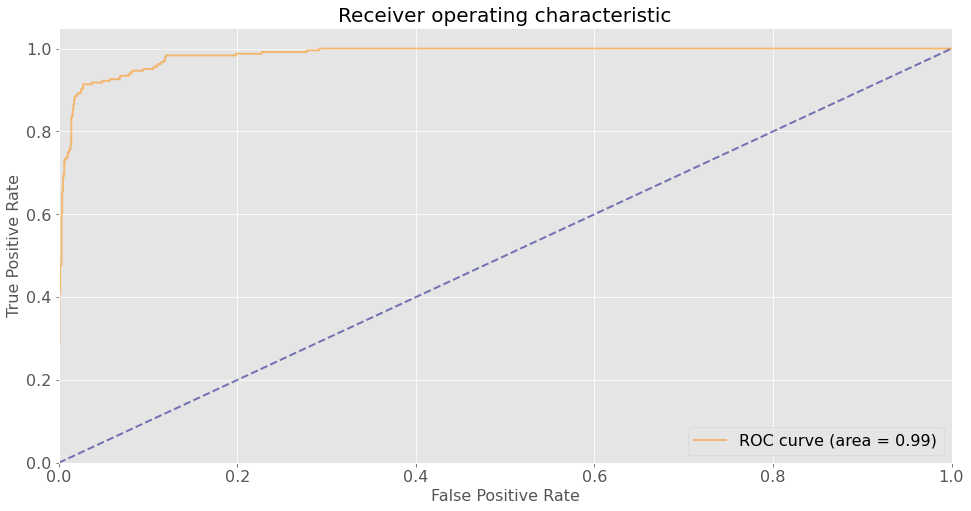

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw=2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

###### Сохраним submission

In [188]:
y_test_pred = np.argmax(catboost_model_main_feat.predict_proba(x_main_test), axis=1)

submission = pd.DataFrame({'churn': y_test_pred})
submission.index.name = 'client_id'
submission.to_csv('submission_catboost_model_main_feat.csv')

submission

,churn
client_id,
0,1
1,0
2,0
3,1
4,0
...,...
2527,0
2528,0
2529,0


#### С исользованием Feature Importances

In [163]:
# убираем целевую
all_features = df_train.columns[:-1]
df_train[all_features]

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,2,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,1,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,3,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,772596783,31,M,1,Graduate,Unknown,Less than $40K,Gold,21,3,2,2,15261.0,1109,14152.0,0.655,15442,125,0.761,0.073
7591,820330008,46,M,5,High School,Married,$120K +,Blue,42,1,1,3,32926.0,1540,31386.0,0.862,8231,98,0.556,0.047
7592,720614658,40,M,2,High School,Divorced,$60K - $80K,Blue,25,6,4,2,2978.0,0,2978.0,0.490,3879,95,0.583,0.000
7593,709759908,46,M,2,Graduate,Married,$60K - $80K,Blue,36,4,2,2,1939.0,685,1254.0,0.421,4327,84,0.680,0.353


In [164]:
# Разделяем данные
x_all_train, x_all_val, y_train, y_val = train_test_split(df_train[all_features], y_data, test_size = .2,  random_state=8,  stratify=y_data)

train_pool = Pool(x_all_train, y_train, cat_features=cat_features)
validate_pool = Pool(x_all_val, y_val, cat_features=cat_features)

In [181]:
catboost_model = CatBoostClassifier(iterations=100,
                                    #custom_metric=['AUC'], 
                                    eval_metric='F1',
                                    class_weights=class_weights,
                                    random_seed=42,
                                    logging_level='Silent').fit(train_pool)

feature_importances = catboost_model.get_feature_importance(train_pool)
feature_names = x_all_train.columns
dic_score={}
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    dic_score.update({name:score})
    print('{}: {}'.format(name, score))

Total_Trans_Amt: 31.70601766016705
Total_Trans_Ct: 24.42848362094851
Total_Revolving_Bal: 7.011422781312477
Total_Amt_Chng_Q4_Q1: 6.923356418904558
Total_Relationship_Count: 5.759571690903088
Total_Ct_Chng_Q4_Q1: 5.162750995717983
Avg_Open_To_Buy: 4.853930920367188
Customer_Age: 2.547545527384779
Months_Inactive_12_mon: 2.3024812515140627
Contacts_Count_12_mon: 2.0420142382791044
Months_on_book: 1.3474632259380834
Avg_Utilization_Ratio: 1.3346512186426156
CLIENTNUM: 1.220854096957216
Credit_Limit: 1.1137342078506776
Marital_Status: 0.9836731732945403
Gender: 0.8856625183639381
Dependent_count: 0.37638645345412874
Income_Category: 0.0
Education_Level: 0.0
Card_Category: 0.0


Важность данных опускается. 
Наибольшее влиянее имеет `Total_Trans_Amt`

In [182]:
# Отбирем в плохие 5 последних
bad_col = list(dic_score.keys())[-5:]

# Отбираем лучшие числовые
imp_num_cols =  [el for el in number_features if el not in bad_col] 

# Отбираем лучшие категориальные
imp_cat_cols = [el for el in cat_features if el not in bad_col]

important_features = imp_num_cols+imp_cat_cols
print('important_features: ', important_features)

# тренеровачные important_features
X_train_imp = x_all_train[important_features]
# проверочные  important_features
X_val_imp = x_all_val[important_features]
imp_train_pool = Pool(X_train_imp, y_train, cat_features=imp_cat_cols)
imp_validate_pool = Pool(X_val_imp, y_val, cat_features=imp_cat_cols)

catboost_model_important_features = CatBoostClassifier(custom_metric=['AUC'], 
                                                      eval_metric='F1',
                                                      class_weights=class_weights,
                                                      random_seed=42,
                                                      ).fit(imp_train_pool)

important_features:  ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Marital_Status']
Learning rate set to 0.022261
0:	learn: 0.8535808	total: 10.9ms	remaining: 10.9s
1:	learn: 0.8782407	total: 20.9ms	remaining: 10.4s
2:	learn: 0.9038021	total: 30.5ms	remaining: 10.1s
3:	learn: 0.8992750	total: 40.1ms	remaining: 9.98s
4:	learn: 0.9070066	total: 49.9ms	remaining: 9.93s
5:	learn: 0.9065886	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9053512	total: 69.7ms	remaining: 9.88s
7:	learn: 0.9073200	total: 79.9ms	remaining: 9.91s
8:	learn: 0.9053834	total: 90.1ms	remaining: 9.91s
9:	learn: 0.9065949	total: 100ms	remaining: 9.93s
10:	learn: 0.9080662	total: 110ms	remaining: 9.91s
11:	learn: 0.9074195	total: 120ms	remaining: 9.88s
12:	learn: 0.9092043	total

In [183]:
y_pred = np.argmax(catboost_model_important_features.predict_proba(X_val_imp), axis=1)
f1_score(y_val, y_pred, sample_weight=smpl_w_val)

0.9562933255163845

In [184]:
roc_auc_score(y_val, y_pred, sample_weight=smpl_w_val)

0.9571054323368692

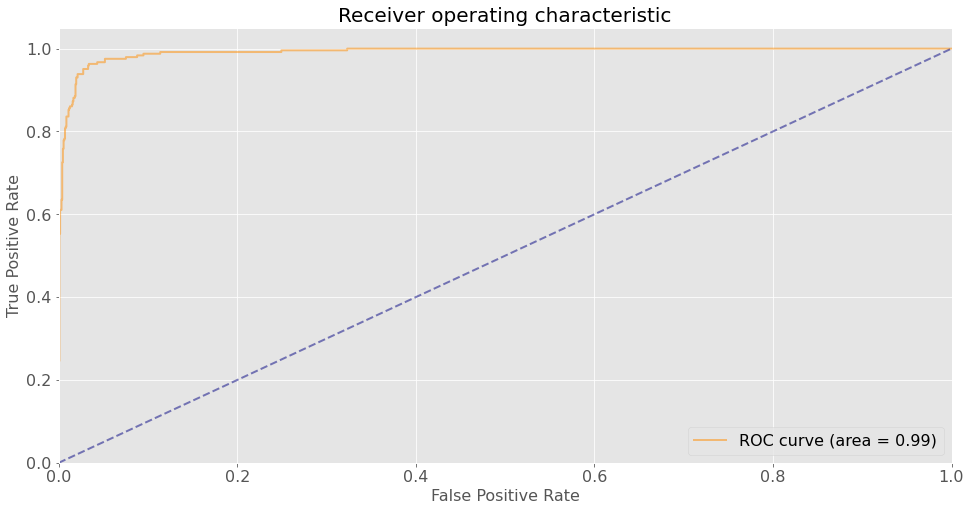

In [185]:
eval_pool = Pool(X_val_imp, y_val, cat_features=imp_cat_cols)
curve = get_roc_curve(catboost_model_important_features, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc= auc(fpr, tpr)

plt.figure(figsize=(16, 8))
lw=2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

Мы повысили точность путем автоматического отбора нужных парамметров

К сожалению есть сейчас проблемы с Cross_Validation в Catbost

###### Сохраним submission

In [189]:
y_test_pred_imp = np.argmax(catboost_model_important_features.predict_proba(df_val[important_features]), axis=1)

submission = pd.DataFrame({'churn': y_test_pred_imp})
submission.index.name = 'client_id'
submission.to_csv('submission_catboost_model_imp_feat.csv')

submission

,churn
client_id,
0,1
1,0
2,0
3,1
4,0
...,...
2527,0
2528,0
2529,0
